In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import time

In [2]:
from setup import *
from data_transform import *
from analyze import *

In [3]:
help(get_loc)

Help on function get_loc in module setup:

get_loc(data, index, P)



In [4]:
file = pd.read_csv('passes.csv')

In [5]:
data =transform(file)

In [6]:
# Count number of correct passes
correct_passes = len(data[(data.sender < 15) & (data.receiver < 15)]) + len(data[(data.sender > 14) & (data.receiver > 14)])
print ('There are',correct_passes, 'correct passes in the data. The other passes could be unintentional.')

There are 10047 correct passes in the data. The other passes could be unintentional.


In [7]:
data.dtypes

sender         int64
receiver       int64
time_start     int64
time_end       int64
P1            object
P2            object
P3            object
P4            object
P5            object
P6            object
P7            object
P8            object
P9            object
P10           object
P11           object
P12           object
P13           object
P14           object
P15           object
P16           object
P17           object
P18           object
P19           object
P20           object
P21           object
P22           object
P23           object
P24           object
P25           object
P26           object
P27           object
P28           object
dtype: object

In [8]:
data.head()

,sender,receiver,time_start,time_end,P1,P2,P3,P4,P5,P6,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,26,18,1396100,1397300,"(890.0, 200.0)","(830.0, -440.0)","(1610.0, -460.0)","(nan, nan)","(310.0, 860.0)","(310.0, -1380.0)",...,"(nan, nan)","(-170.0, 3080.0)","(140.0, -180.0)","(-4820.0, -110.0)","(-2090.0, 390.0)","(-310.0, -2470.0)","(-1010.0, 330.0)","(100.0, 0.0)","(nan, nan)","(-1550.0, 1430.0)"
1,11,14,78900,81100,"(3070.0, 800.0)","(nan, nan)","(940.0, -460.0)","(4450.0, 2050.0)","(1460.0, 1320.0)","(1680.0, 2300.0)",...,"(-110.0, 2240.0)","(nan, nan)","(nan, nan)","(-660.0, -720.0)","(1960.0, 2470.0)","(2810.0, 1230.0)","(4960.0, 1380.0)","(-580.0, 770.0)","(3310.0, -1350.0)","(1360.0, -160.0)"
2,4,10,36600,37300,"(-180.0, 1040.0)","(nan, nan)","(-1440.0, 1010.0)","(-160.0, 2330.0)","(-1370.0, 1070.0)","(-1140.0, 1330.0)",...,"(-1580.0, 2250.0)","(nan, nan)","(nan, nan)","(-2290.0, 320.0)","(-440.0, 2230.0)","(-170.0, 1370.0)","(600.0, 570.0)","(-2170.0, 1340.0)","(-250.0, -920.0)","(-1420.0, 650.0)"
3,12,7,370300,371300,"(-950.0, 1170.0)","(-1140.0, -390.0)","(1110.0, 530.0)","(nan, nan)","(-310.0, 2370.0)","(-2210.0, -1870.0)",...,"(3960.0, 70.0)","(nan, nan)","(710.0, -400.0)","(-1570.0, 1620.0)","(-590.0, 270.0)","(-250.0, 1200.0)","(-70.0, -1810.0)","(-1540.0, 170.0)","(160.0, 1820.0)","(nan, nan)"
4,15,24,600,1400,"(-880.0, -20.0)","(-930.0, 1040.0)","(-1460.0, -1660.0)","(150.0, -720.0)","(-740.0, -330.0)","(-110.0, 1370.0)",...,"(nan, nan)","(1290.0, -450.0)","(2340.0, -480.0)","(950.0, 260.0)","(nan, nan)","(0.0, -210.0)","(830.0, 2650.0)","(10.0, 2380.0)","(1230.0, -2790.0)","(nan, nan)"


In [9]:
list_ = [i for i in np.arange(len(data))]

In [10]:
print (get_loc(data,0,'P26')[0])
print (get_loc(data,0,'P18'))
print (distance(data,0,'P21','P18'))

100.0
(-850.0, -180.0)
990.0


In [11]:
## This code block generates 100 images each representing an instance of a pass
# import random
# sample = random.sample(range(1, 10000), 100)

# for i,h in enumerate(sample):
#     plot_instance(data,h)
#     plt.savefig(r'images\\' + str(sample[i])+'.png')
#     plt.figure()

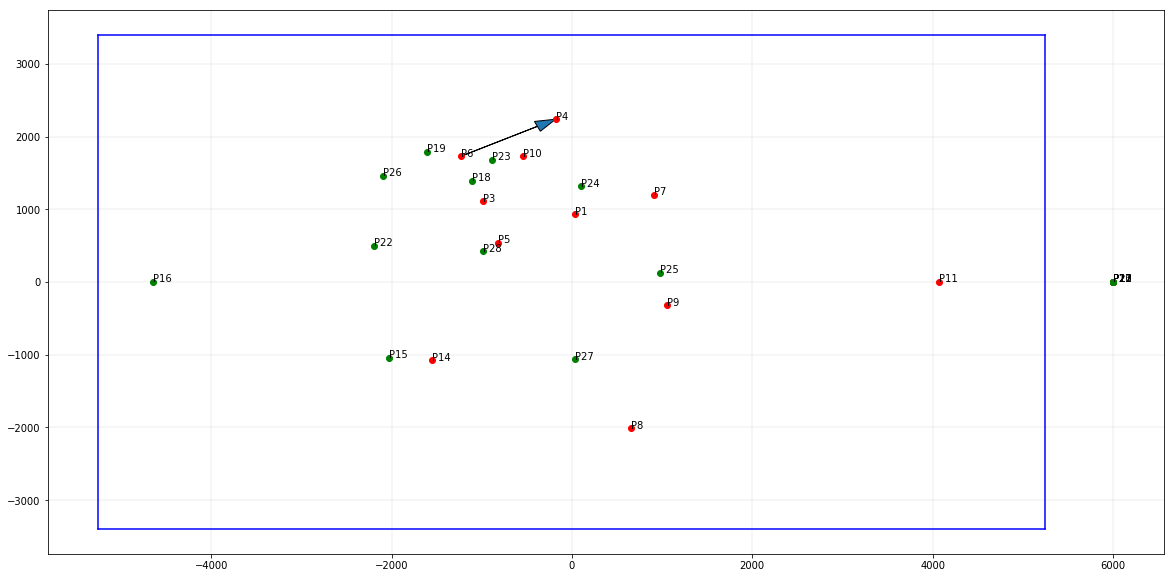

In [12]:
# Generate an image
plot_instance(data,100)
plt.show()

In [13]:
remove = []
# Same sender and receiver
for index_ in data.index:
    if data.sender[index_] == data.receiver[index_]:
        remove.append(index_)
        print (index_)        

655
2268
2729
9082
9795
11269


In [14]:
# Receiver is nan
for index_ in data.index:
    if (np.isfinite(data.receiver[index_])):
        if (np.isfinite(data['P'+str(int(data.receiver[index_]))][index_][0]) == False):
            remove.append(index_)
            print (index_)

898


In [15]:
# Sender is nan
for index_ in data.index:
    if (np.isfinite(data.sender[index_])):
        if (np.isfinite(data['P'+str(int(data.sender[index_]))][index_][0]) == False):
            remove.append(index_)
            print (index_)

1161


In [16]:
remove

[655, 2268, 2729, 9082, 9795, 11269, 898, 1161]

In [17]:
data.loc[5,'P7']

(nan, nan)

In [18]:
mapp=map_player(data,3432)
mapp

[(1, 1216.4292005702594),
 (3, 1303.8404810405298),
 (11, 1373.608386695422),
 (6, 2048.3163818121457),
 (5, 2603.2479712851023),
 (13, 2733.5873865673288),
 (4, 3860.8289265389626),
 (9, 4026.1768465878395),
 (10, 4081.0047782378301),
 (12, 5014.14997781279),
 (21, 121.6552506059644),
 (15, 346.69871646719434),
 (26, 906.20086073673531),
 (28, 909.17545061445651),
 (18, 1173.243367763057),
 (25, 1179.2370414806346),
 (27, 1591.7600321656528),
 (22, 2268.0828909014767),
 (23, 2410.0622398602072),
 (17, 2635.773131360133),
 (24, 3930.2417228460645)]

In [19]:
import time
start = time.time()
X = np.zeros((1,21))
Y = np.zeros((1,21))
for i in data.index:
    if i not in remove and i!= len(data):
        x,y = make_feature(data,i)
        if x.shape[0] == 21:
            X = np.append(X,(np.array([x])),axis=0)
            Y = np.append(Y,y,axis=0)
            
    if i%500 == 0:
        print ('#####  Reached ', i,'/12124')
            
end = time.time()
            
print ('Time taken to run this block= ',(end-start)/60,' min.')

#####  Reached  0 /12124
#####  Reached  500 /12124
#####  Reached  1000 /12124
#####  Reached  1500 /12124
#####  Reached  2000 /12124
#####  Reached  2500 /12124
#####  Reached  3000 /12124
#####  Reached  3500 /12124
#####  Reached  4000 /12124
#####  Reached  4500 /12124
#####  Reached  5000 /12124
#####  Reached  5500 /12124
#####  Reached  6000 /12124
#####  Reached  6500 /12124
#####  Reached  7000 /12124
#####  Reached  7500 /12124
#####  Reached  8000 /12124
#####  Reached  8500 /12124
#####  Reached  9000 /12124
#####  Reached  9500 /12124
#####  Reached  10000 /12124
#####  Reached  10500 /12124
#####  Reached  11000 /12124
#####  Reached  11500 /12124
#####  Reached  12000 /12124
Time taken to run this block=  5.347816741466522  min.


In [20]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            12114, 12115, 12116, 12117, 12118, 12119, 12120, 12121, 12122,
            12123],
           dtype='int64', length=12124)

In [21]:
X = (np.delete(X, (0), axis=0))
Y = (np.delete(Y, (0), axis=0))

In [22]:
X.shape,Y.shape

((11682, 21), (11682, 21))

In [23]:
np.savetxt('unscaled_featmat.txt',X)
np.savetxt('unscaled_labels.txt',Y)

In [24]:
Y_list = []
for row in Y:
    for i,element in enumerate(row):
        if element == 1:
            Y_list.append(i+1)
            continue

Nearest teammember rank  1  . Percent of all passes =  27.418250299606232
Nearest teammember rank  2  . Percent of all passes =  19.174798835815785
Nearest teammember rank  3  . Percent of all passes =  11.50487930148947
Nearest teammember rank  4  . Percent of all passes =  7.669919534326314
Nearest teammember rank  5  . Percent of all passes =  5.213148433487417
Nearest teammember rank  6  . Percent of all passes =  3.9291217257318953
Nearest teammember rank  7  . Percent of all passes =  2.6022941277178564
Nearest teammember rank  8  . Percent of all passes =  2.131484334874165
Nearest teammember rank  9  . Percent of all passes =  1.891799349426468
Nearest teammember rank  10  . Percent of all passes =  1.275466529703818


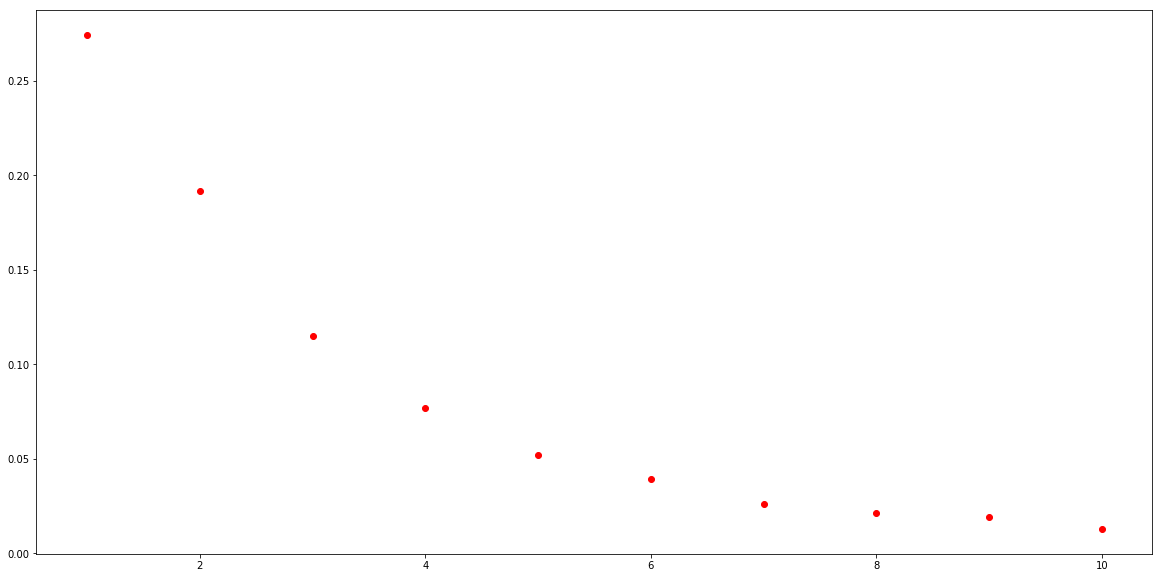

In [25]:
Frac_pass_list=[]

for i in range(1,11):
    print ('Nearest teammember rank ',i,' . Percent of all passes = ',Y_list.count(i)*100/Y.shape[0])
    Frac_pass_list.append(Y_list.count(i)/Y.shape[0])
    
    plt.plot(i,Y_list.count(i)/Y.shape[0],'ro')    
plt.show()